In [1]:
# Required Libraries
import geopandas as gpd
from shapely.geometry import box
import matplotlib.pyplot as plt
from contextily import add_basemap
import contextily as cx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from shapely import wkt

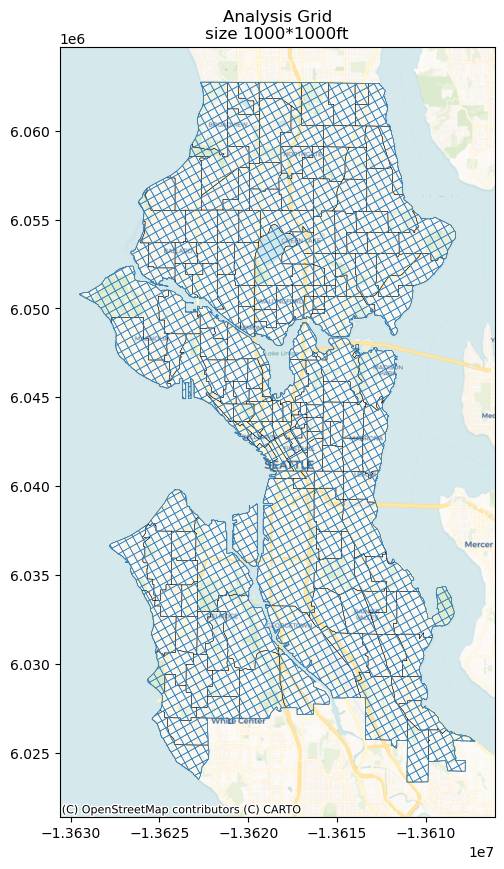

In [3]:
# 加载seattle boundary
seattle_boundary = gpd.read_file("Seattle_City_Boundary.geojson")
seattle_boundary = seattle_boundary.to_crs(epsg=2272)  # Transform to a projection in feet

# 设置grid大小
grid_size = 1000  # 1000 feet

# 在seattle boundary 绘制 grids
minx, miny, maxx, maxy = seattle_boundary.total_bounds
x_range = maxx - minx
y_range = maxy - miny

# 绘制grids
rows = int(y_range / grid_size)
cols = int(x_range / grid_size)
grid = []
for i in range(cols + 1):
    for j in range(rows + 1):
        grid.append(box(minx + i * grid_size, miny + j * grid_size, minx + (i + 1) * grid_size, miny + (j + 1) * grid_size))


# 选择适合的投影坐标系统（例如 Web Mercator）
projected_crs = '3857'  # Web Mercator 投影
# 确保 CRS 转换

grid_gdf = gpd.GeoDataFrame(geometry=grid, crs=seattle_boundary.crs)
grid_gdf = gpd.clip(grid_gdf, seattle_boundary)
grid_gdf = grid_gdf.to_crs(epsg=projected_crs)
seattle_boundary = seattle_boundary.to_crs(epsg=projected_crs)

# 计算几何中心
centroids = grid_gdf.centroid

# Plot the grid
fig, ax = plt.subplots(figsize=(10, 10))

seattle_boundary.plot(ax=ax, color='none', edgecolor='black',linewidth=0.3)
grid_gdf.plot(ax=ax, facecolor='none', edgecolor='#3182bd', linewidth=0.5)
# Add basemap
cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12)

plt.title("Analysis Grid\nsize 1000*1000ft")
plt.show()

In [4]:
grid_gdf.to_csv('park_info_with_grids.csv')

In [5]:
data = pd.read_csv('park_info_with_grids.csv')

In [6]:
data.head()

,Unnamed: 0,geometry
0,2852,POLYGON ((-13608159.542091612 6024257.98859704...
1,2853,POLYGON ((-13607787.487571653 6024509.44823132...
2,2945,POLYGON ((-13607809.246946076 6024549.04298070...
3,2854,POLYGON ((-13608375.281126145 6024650.51686370...
4,3038,POLYGON ((-13607416.937333116 6025692.29186245...


In [7]:
from shapely import wkt
data['geometry'] = data['geometry'].apply(wkt.loads)

In [8]:
data_df = gpd.GeoDataFrame(data,geometry = 'geometry')

<Axes: >

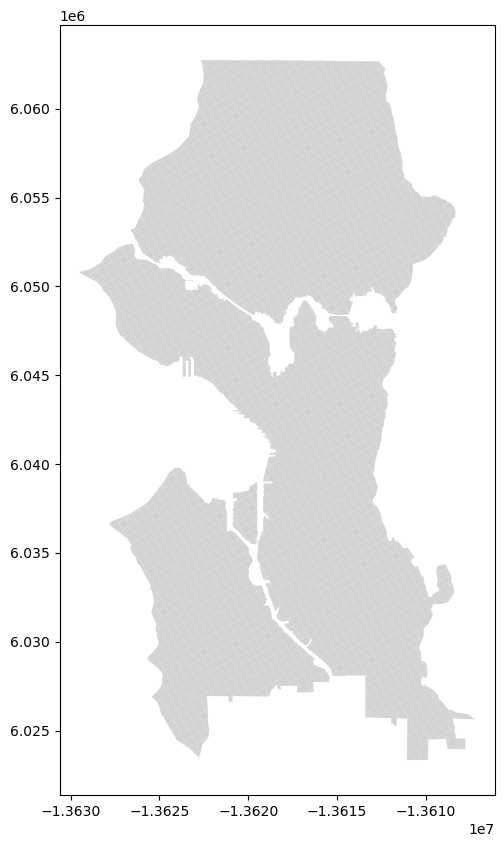

In [14]:
fig,ax = plt.subplots(figsize = (10,10))
data_df.plot(ax = ax,facecolor = 'lightgrey',linewidth = 1.5)

In [16]:
data = pd.read_csv('park_information_all.csv')
data.columns

Index(['Unnamed: 0', 'OBJECTID', 'NAME', 'PMA_NAME', 'ADDRESS', 'PIN',
       'SUBPARCEL', 'TOTAL_AREA', 'OWNER', 'LEASE', 'MAINT', 'TYPE',
       'ACQ_DATE', 'NAMEFLAG', 'REVIEW_DATE', 'AMWOID', 'SDQL',
       'SE_ANNO_CAD_DATA', 'GIS_CRT_DT', 'GIS_EDT_DT', 'GlobalID', 'centroid',
       'isochrones', 'geometry', 'Schools_count', 'Landmarks_count',
       'Metros_count', 'Housings_count', 'Affordable_Housings_count',
       'job_count', 'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE'],
      dtype='object')

In [17]:
# 将geometry列从WKT字符串转换为shapely的几何对象
data['geometry'] = data['geometry'].apply(wkt.loads)
data['centroid'] = data['centroid'].apply(wkt.loads)

In [18]:
data['geometry']

0       POLYGON ((-13622737.379016053 6023640.77629757...
1       POLYGON ((-13622809.152746124 6023663.18716869...
2       POLYGON ((-13622749.842252705 6023792.89872822...
3       POLYGON ((-13622845.403796576 6023793.75176458...
4       POLYGON ((-13622922.56046442 6023813.85027619,...
                              ...                        
2664    POLYGON ((-13620012.447558833 6056038.33277760...
2665    POLYGON ((-13619946.868299698 6055954.82724360...
2666    POLYGON ((-13619983.43788498 6055998.306954403...
2667    POLYGON ((-13619891.669225052 6061234.74298121...
2668    POLYGON ((-13619994.884063529 6062423.76536363...
Name: geometry, Length: 2669, dtype: object

In [22]:
park_gdf = gpd.GeoDataFrame(data,geometry = 'geometry')
park_gdf.head()

,Unnamed: 0,OBJECTID,NAME,PMA_NAME,ADDRESS,PIN,SUBPARCEL,TOTAL_AREA,OWNER,LEASE,...,nearest_school_distance,nearest_landmark_distance,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE
0,0,660345,SEOLA PARK,Seola Park,,7110000066,22024.0,466,DPR,N,...,3452.078700,4496.596161,6.523181,16.803735,1340.473015,53.224039,7.445560,14.533173,28.095383,8.705330
1,1,659362,SEOLA PARK,Seola Park,,1123039030,9627.0,466,DPR,N,...,3419.786172,4468.062235,9.128640,95.845727,1090.873153,55.335690,5.004556,13.980434,21.342277,2.651710
2,2,659360,SEOLA PARK,Seola Park,,1223039013,9627.0,466,DPR,N,...,3361.940206,4409.443064,50.796062,84.319267,748.194085,51.364259,3.178540,20.553536,72.919848,7.432395
3,3,660174,SEOLA PARK,Seola Park,NaN,NaN,9627.0,466,DPR,N,...,3351.203768,4401.806958,6.525327,148.302319,1138.385089,44.467581,6.452216,15.853316,75.931649,15.587020
4,4,659359,SEOLA PARK,Seola Park,,1123039028,9628.0,466,DPR,N,...,3352.688184,4406.373465,22.683068,128.920052,187.901788,66.224703,4.815073,11.304955,29.867411,5.094208


In [24]:
# 过滤掉无效的几何对象
park_gdf = park_gdf[park_gdf.is_valid]

In [25]:
# 过滤掉空的几何对象
park_gdf = park_gdf.dropna(subset = ['geometry'])

Text(0.5, 1.0, 'Park in Seattle')

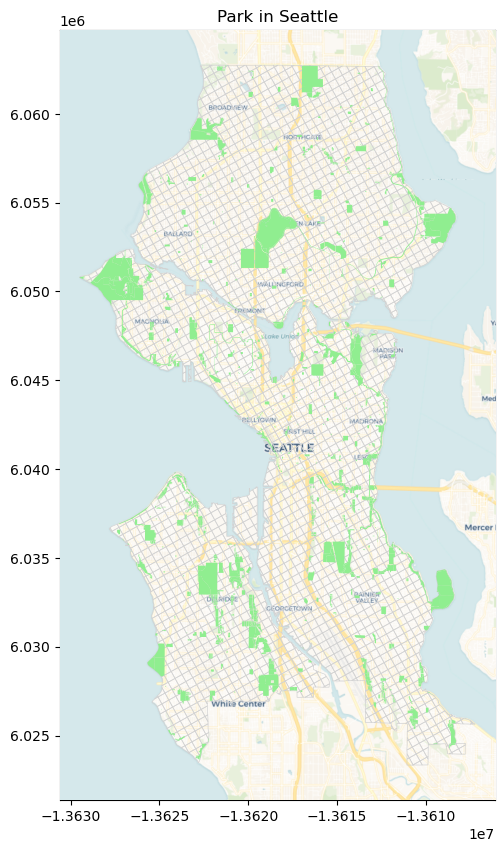

In [35]:
fig,ax = plt.subplots(figsize = (10,10))
park_gdf.plot(ax=ax,facecolor = 'lightgreen',zorder = 15)
data_df.plot(ax = ax,facecolor = 'none',edgecolor = 'lightgray',linewidth = 0.5,zorder = 10)
cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager, zoom=12,zorder = 5)
plt.title('Park in Seattle')

In [37]:
park_gdf.set_crs(epsg=projected_crs,inplace=True)
park_gdf = park_gdf.to_crs(epsg = projected_crs)
park_in_grid = gpd.sjoin(park_gdf, grid_gdf, how="left", predicate='intersects')
park_in_grid.columns

Index(['Unnamed: 0', 'OBJECTID', 'NAME', 'PMA_NAME', 'ADDRESS', 'PIN',
       'SUBPARCEL', 'TOTAL_AREA', 'OWNER', 'LEASE', 'MAINT', 'TYPE',
       'ACQ_DATE', 'NAMEFLAG', 'REVIEW_DATE', 'AMWOID', 'SDQL',
       'SE_ANNO_CAD_DATA', 'GIS_CRT_DT', 'GIS_EDT_DT', 'GlobalID', 'centroid',
       'isochrones', 'geometry', 'Schools_count', 'Landmarks_count',
       'Metros_count', 'Housings_count', 'Affordable_Housings_count',
       'job_count', 'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE', 'index_right'],
      dtype='object')

In [38]:
# 重置 parks_in_grid 和 grid_gdf 的索引，确保它们的索引是唯一的
park_in_grid = park_in_grid.reset_index(drop = True)
# drop = True 表示丢弃原来的索引，不将其作为新的列添加到 DataFrame 中。

# 设置grid_id
grid_gdf.reset_index(drop = True,inplace = True)
grid_gdf['grid_id'] = grid_gdf.index

In [41]:
park_gdf.set_crs(epsg=projected_crs,inplace=True)
park_gdf = park_gdf.to_crs(epsg = projected_crs)
park_in_grid = gpd.sjoin( grid_gdf,park_gdf, how="left", predicate='intersects')
features_to_weight = ['Schools_count', 'Landmarks_count',
       'Metros_count', 'Housings_count', 'Affordable_Housings_count',
       'job_count', 'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE','TOTAL_AREA']

park_in_grid.columns

Index(['geometry', 'grid_id', 'index_right', 'Unnamed: 0', 'OBJECTID', 'NAME',
       'PMA_NAME', 'ADDRESS', 'PIN', 'SUBPARCEL', 'TOTAL_AREA', 'OWNER',
       'LEASE', 'MAINT', 'TYPE', 'ACQ_DATE', 'NAMEFLAG', 'REVIEW_DATE',
       'AMWOID', 'SDQL', 'SE_ANNO_CAD_DATA', 'GIS_CRT_DT', 'GIS_EDT_DT',
       'GlobalID', 'centroid', 'isochrones', 'Schools_count',
       'Landmarks_count', 'Metros_count', 'Housings_count',
       'Affordable_Housings_count', 'job_count',
       'nearest_residential_distance', 'nearest_MHA_distance',
       'nearest_metro_distance', 'nearest_school_distance',
       'nearest_landmark_distance', 'nearest_park_distance',
       'distance_to_nearest_bike_network', 'POP_DENSITY',
       'EMPLOYED_PERCENTAGE', 'UNDER5_PERCENTAGE', '65_PERCENTAGE',
       'PEOPLE_OF_COLOR_PERCENTAGE', 'POVERTY_PERCENTAGE'],
      dtype='object')

In [43]:
park_in_grid

,geometry,grid_id,index_right,Unnamed: 0,OBJECTID,NAME,PMA_NAME,ADDRESS,PIN,SUBPARCEL,...,nearest_school_distance,nearest_landmark_distance,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE
0,"POLYGON ((-13608159.542 6024257.989, -13607787...",0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"POLYGON ((-13607787.488 6024509.448, -13607787...",1,929.0,929.0,660932.0,LAKERIDGE PARK,Lakeridge Park,10201 Holyoke Way S,0123049002,48.0,...,1934.629021,9347.432972,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624
2,"POLYGON ((-13607809.247 6024549.043, -13607787...",2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"POLYGON ((-13608375.281 6024650.517, -13608591...",3,929.0,929.0,660932.0,LAKERIDGE PARK,Lakeridge Park,10201 Holyoke Way S,0123049002,48.0,...,1934.629021,9347.432972,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624
4,"POLYGON ((-13607416.937 6025692.292, -13607389...",4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"POLYGON ((-13620105.278 6061757.117, -13620322...",2672,2668.0,2668.0,660923.0,BITTER LAKE OPEN SPACE PARK,Bitter Lake Open Space Park,14201 Linden Ave N,1926049009,16468.0,...,1197.516872,491.326324,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689
2673,"POLYGON ((-13619537.166 6062586.261, -13619620...",2673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2674,"POLYGON ((-13619929.75 6062368.569, -13620322....",2674,2668.0,2668.0,660923.0,BITTER LAKE OPEN SPACE PARK,Bitter Lake Open Space Park,14201 Linden Ave N,1926049009,16468.0,...,1197.516872,491.326324,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689
2675,"POLYGON ((-13619537.166 6062586.261, -13619929...",2675,2668.0,2668.0,660923.0,BITTER LAKE OPEN SPACE PARK,Bitter Lake Open Space Park,14201 Linden Ave N,1926049009,16468.0,...,1197.516872,491.326324,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689


In [44]:
grid_stats = park_in_grid.groupby(park_in_grid.index).agg({
    'Schools_count': 'sum',
    'Landmarks_count': 'sum',
    'Metros_count': 'sum',
    'Housings_count': 'sum',
    'Affordable_Housings_count': 'sum',
    'job_count': 'sum',
    'nearest_residential_distance': 'mean',
    'nearest_MHA_distance': 'mean',
    'nearest_metro_distance': 'mean',
    'nearest_school_distance': 'mean',
    'nearest_landmark_distance': 'mean',
    'nearest_park_distance': 'mean',
    'distance_to_nearest_bike_network': 'mean',
    'POP_DENSITY': 'mean',
    'EMPLOYED_PERCENTAGE': 'mean',
    'UNDER5_PERCENTAGE': 'mean',
    '65_PERCENTAGE': 'mean',
    'PEOPLE_OF_COLOR_PERCENTAGE': 'mean',
    'POVERTY_PERCENTAGE': 'mean',
    'TOTAL_AREA': 'sum',
    'TYPE': 'first'
    # 添加更多你想要计算的列
})

grid_stats

,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,nearest_residential_distance,nearest_MHA_distance,nearest_metro_distance,nearest_school_distance,...,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE,TOTAL_AREA,TYPE
0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,0.0,0.0,48.0,5.0,10.0,0.0,1447.410296,811.368482,619.219723,1934.629021,...,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624,411.0,2.0
2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,0.0,0.0,48.0,5.0,10.0,0.0,1447.410296,811.368482,619.219723,1934.629021,...,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624,411.0,2.0
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,178.962216,1197.516872,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0
2673,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2674,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,178.962216,1197.516872,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0
2675,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,178.962216,1197.516872,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0


In [45]:
for col in grid_stats.columns:
    grid_gdf[col] = grid_gdf.index.map(grid_stats[col]) 

grid_gdf

,geometry,grid_id,Schools_count,Landmarks_count,Metros_count,Housings_count,Affordable_Housings_count,job_count,nearest_residential_distance,nearest_MHA_distance,...,nearest_park_distance,distance_to_nearest_bike_network,POP_DENSITY,EMPLOYED_PERCENTAGE,UNDER5_PERCENTAGE,65_PERCENTAGE,PEOPLE_OF_COLOR_PERCENTAGE,POVERTY_PERCENTAGE,TOTAL_AREA,TYPE
0,"POLYGON ((-13608159.542 6024257.989, -13607787...",0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
1,"POLYGON ((-13607787.488 6024509.448, -13607787...",1,0.0,0.0,48.0,5.0,10.0,0.0,1447.410296,811.368482,...,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624,411.0,2.0
2,"POLYGON ((-13607809.247 6024549.043, -13607787...",2,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
3,"POLYGON ((-13608375.281 6024650.517, -13608591...",3,0.0,0.0,48.0,5.0,10.0,0.0,1447.410296,811.368482,...,339.631321,196.315747,866.023819,56.361547,8.709761,9.778676,54.274587,9.188624,411.0,2.0
4,"POLYGON ((-13607416.937 6025692.292, -13607389...",4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2672,"POLYGON ((-13620105.278 6061757.117, -13620322...",2672,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0
2673,"POLYGON ((-13619537.166 6062586.261, -13619620...",2673,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
2674,"POLYGON ((-13619929.75 6062368.569, -13620322....",2674,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0
2675,"POLYGON ((-13619537.166 6062586.261, -13619929...",2675,0.0,0.0,0.0,0.0,0.0,0.0,539.465735,92.612716,...,1014.418386,42.263249,770.010631,42.266211,4.850767,24.567671,17.000450,2.801689,4450.0,1.0


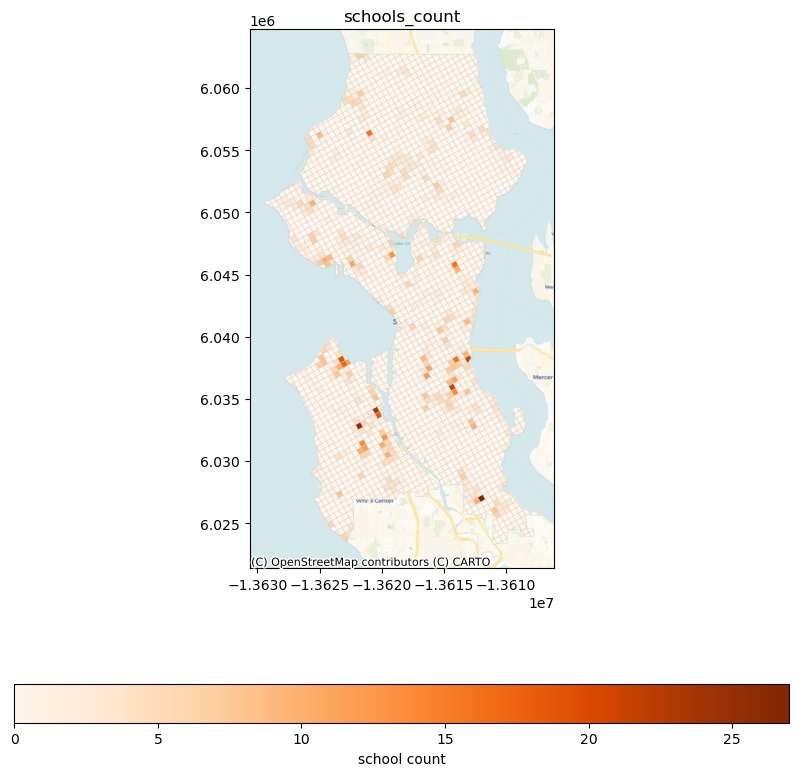

In [47]:
fig, ax = plt.subplots(figsize=(10, 10))
grid_gdf.plot(column='Schools_count', cmap='Oranges', linewidth=0.3, ax=ax, edgecolor='lightgray', legend=True, 
              legend_kwds={'label': "school count",
                           'orientation': "horizontal"})
plt.title("schools_count")
cx.add_basemap(ax, crs=grid_gdf.crs.to_string(), source=cx.providers.CartoDB.Voyager,zoom=12)
plt.show()